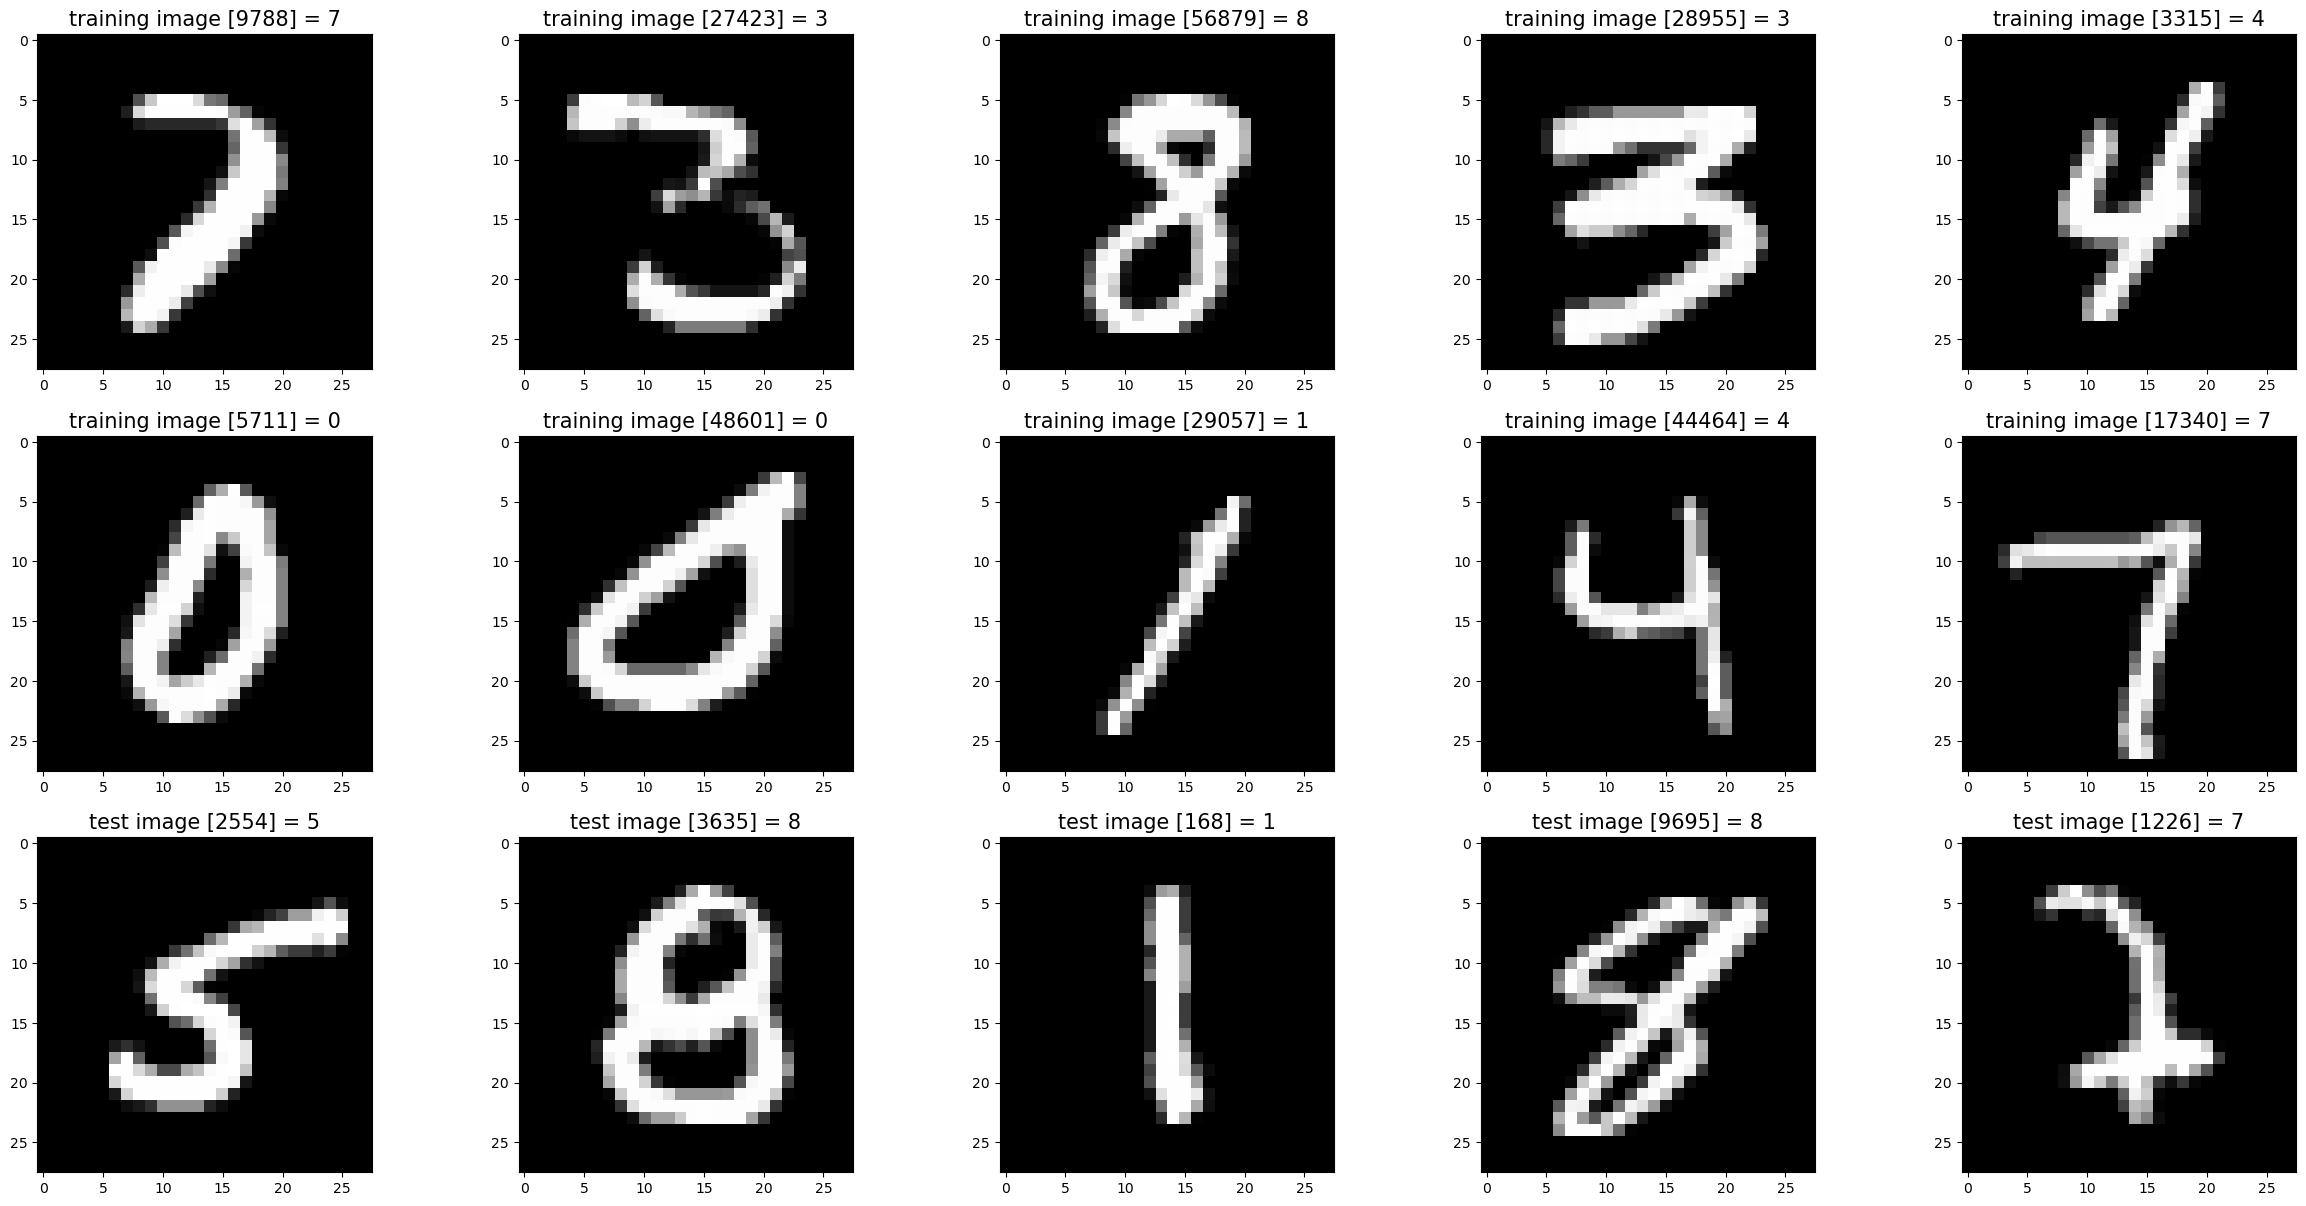

In [12]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
from MnistReader import MnistDataloader
from perceptron_2 import Perceptron

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [13]:
x_train = np.array(x_train)
y_train = np.array(y_train) 
x_test = np.array(x_test)
y_test = np.array(y_test)

n = 10

if n == 2:
    mask = (y_train == 1) | (y_train == 0)
    x_train = x_train[mask]
    y_train = y_train[mask]
    
    mask = (y_test == 1) | (y_test == 0)
    x_test = x_test[mask]
    y_test = y_test[mask]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(data, accuracy):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Точность: {round(accuracy, 2)}')
    plt.show()

In [15]:
class_count = 10

Эпоха: 1, Entropy: 0.0033748531297495728


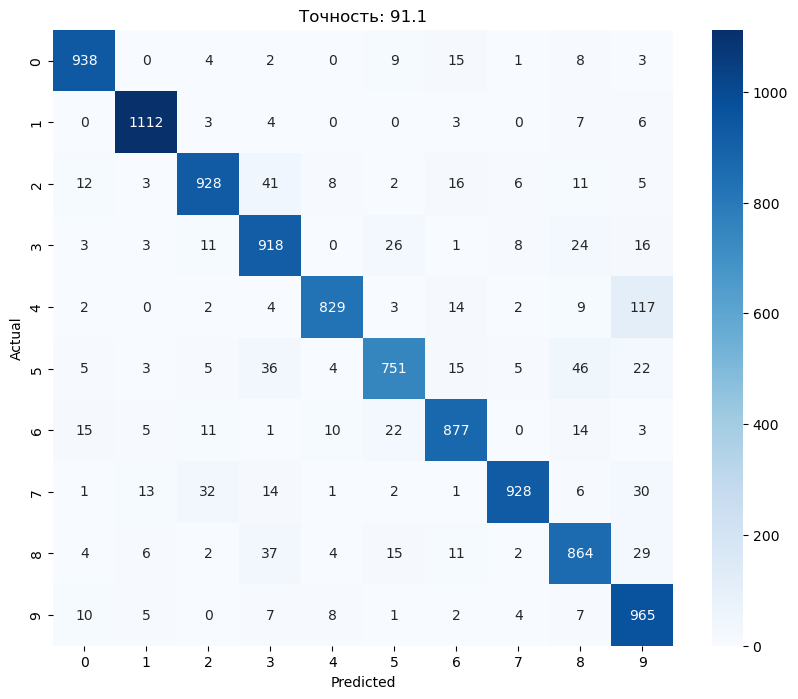

In [16]:
p = Perceptron()
p.load_dataset(x_train, y_train, x_test, y_test)
p.init_weights(class_count=class_count, hidden_size=20)
w1, w2 = p.fit(iterations_number=1)
accuracy, confusion_matrix_test = p.predict(class_count=class_count)
plot(confusion_matrix_test, accuracy)